In [1]:
import pandas as pd

combined_data = pd.read_csv("merged_data.csv")

numeric_cols = ['FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB']

teamA_stats = combined_data[['date', 'teamA', 'teamA_FG_PCT', 'teamA_FT_PCT', 'teamA_FG3_PCT', 'teamA_AST', 'teamA_REB']].copy()
teamA_stats.columns = ['date', 'team', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB']

teamB_stats = combined_data[['date', 'teamB', 'teamB_FG_PCT', 'teamB_FT_PCT', 'teamB_FG3_PCT', 'teamB_AST', 'teamB_REB']].copy()
teamB_stats.columns = ['date', 'team', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB']

In [2]:
long_stats = pd.concat([teamA_stats, teamB_stats])
long_stats = long_stats.sort_values(['team', 'date'])

rolling_stats = (
    long_stats
    .groupby('team', group_keys=False)
    .apply(lambda x: x.sort_values('date')
           .rolling(window=5, on='date', closed='left')[numeric_cols].mean())
    .reset_index()
)
rolling_stats['team'] = long_stats['team'].values
rolling_stats['date'] = long_stats['date'].values

rolling_stats = rolling_stats.rename(columns={
    'FG_PCT': 'FG_PCT_avg',
    'FT_PCT': 'FT_PCT_avg',
    'FG3_PCT': 'FG3_PCT_avg',
    'AST': 'AST_avg',
    'REB': 'REB_avg'
})

df = combined_data.copy()

df = df.merge(rolling_stats, left_on=['date', 'teamA'], right_on=['date', 'team'], how='left')
df = df.rename(columns={col: col + '_A' for col in ['FG_PCT_avg', 'FT_PCT_avg', 'FG3_PCT_avg', 'AST_avg', 'REB_avg']})
df = df.drop(columns=['team'])

df = df.merge(rolling_stats, left_on=['date', 'teamB'], right_on=['date', 'team'], how='left')
df = df.rename(columns={col: col + '_B' for col in ['FG_PCT_avg', 'FT_PCT_avg', 'FG3_PCT_avg', 'AST_avg', 'REB_avg']})
df = df.drop(columns=['team'])

df['fg_pct_diff'] = df['FG_PCT_avg_A'] - df['FG_PCT_avg_B']
df['ft_pct_diff'] = df['FT_PCT_avg_A'] - df['FT_PCT_avg_B']
df['fg3_pct_diff'] = df['FG3_PCT_avg_A'] - df['FG3_PCT_avg_B']
df['ast_diff'] = df['AST_avg_A'] - df['AST_avg_B']
df['reb_diff'] = df['REB_avg_A'] - df['REB_avg_B']
df['moneyline_diff'] = df['teamA_moneyLine'] - df['teamB_moneyLine']

df['score_diff'] = df['teamA_score'] - df['teamB_score']

feature_cols = ['fg_pct_diff', 'ft_pct_diff', 'fg3_pct_diff', 'ast_diff', 'reb_diff', 'moneyline_diff']
df_model = df.dropna(subset=feature_cols + ['score_diff']).copy()


/var/folders/9r/gvxmfp9n2f755ttktlmwy7rm0000gn/T/ipykernel_69119/1247078388.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values('date')


In [3]:
df_model

,date,season,teamA,teamB,teamA_home,teamA_score,teamB_score,teamA_moneyLine,teamB_moneyLine,total,...,FG_PCT_avg_B,FT_PCT_avg_B,REB_avg_B,fg_pct_diff,ft_pct_diff,fg3_pct_diff,ast_diff,reb_diff,moneyline_diff,score_diff
70,2016-11-04,2017,golden state,la lakers,0,97,117,-900.0,600.0,228.5,...,0.4542,0.8304,41.8,0.0370,-0.0300,0.0170,10.2,1.8,-1500.0,-20
72,2016-11-04,2017,san antonio,utah,0,100,86,-165.0,145.0,183.5,...,0.4506,0.7758,40.2,-0.0020,0.0858,0.0402,3.4,4.4,-310.0,14
73,2016-11-04,2017,new orleans,phoenix,1,111,112,-145.0,125.0,210.5,...,0.4340,0.7236,47.6,-0.0212,0.0364,-0.0372,5.2,-5.2,-270.0,-1
78,2016-11-05,2017,chicago,indiana,0,94,111,145.0,-165.0,209.5,...,0.4624,0.7750,41.8,-0.0040,0.0528,-0.0050,-2.6,8.4,310.0,-17
81,2016-11-05,2017,la clippers,san antonio,0,116,92,170.0,-200.0,197.5,...,0.4418,0.8664,43.4,-0.0250,-0.1770,-0.0838,-1.8,2.4,370.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7257,2022-04-10,2022,la clippers,oklahoma city,1,138,88,-800.0,550.0,216.5,...,0.4540,0.6670,46.2,0.0482,0.1466,0.1218,4.4,-2.2,-1350.0,50
7258,2022-04-10,2022,new york,toronto,1,105,94,-110.0,-110.0,214.0,...,0.4460,0.8112,44.2,-0.0040,-0.0806,0.0638,3.6,-0.6,0.0,11
7259,2022-04-10,2022,phoenix,sacramento,1,109,116,-500.0,400.0,227.0,...,0.4640,0.7792,40.4,0.0044,-0.0228,0.0112,4.4,4.6,-900.0,-7
7260,2022-04-10,2022,golden state,new orleans,0,128,107,-280.0,240.0,222.5,...,0.4712,0.8060,42.6,-0.0012,0.0416,0.0610,4.4,3.8,-520.0,21


In [4]:
df_model.to_csv("merged_data_features.csv", index=False)

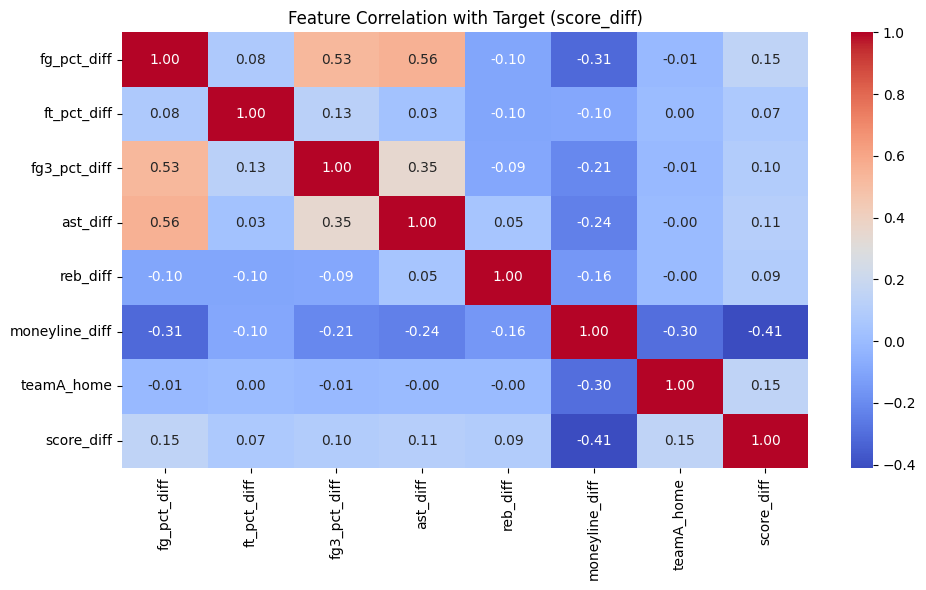

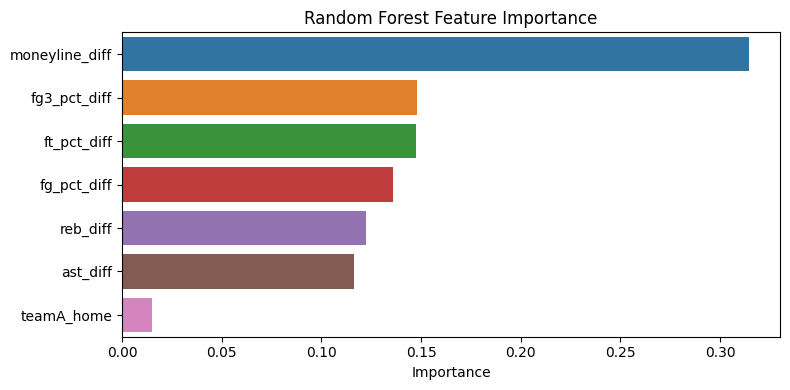

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Feature columns and target
feature_cols = ['fg_pct_diff', 'ft_pct_diff', 'fg3_pct_diff', 'ast_diff', 'reb_diff', 'moneyline_diff','teamA_home']
target_col = 'score_diff'

# Correlation heatmap
corr = df_model[feature_cols + [target_col]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Target (score_diff)")
plt.tight_layout()
plt.show()

# Feature importance via Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(df_model[feature_cols], df_model[target_col])
importances = pd.Series(rf_model.feature_importances_, index=feature_cols).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
